In [3]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [6]:
df = pd.read_csv('~/DataScience/Project/raw_df.csv')
df.head()

,UDI,Product_ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

In [47]:
y = df['HDF']

X = df[['Air_temperature', 'Rotational_speed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

In [73]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500, random_state=23)
RFC.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=23)

In [74]:
from sklearn.metrics import accuracy_score

y_predict_RFC = RFC.predict(X_test)

#compute accuracy and print it
print("Accuracy:", metrics.accuracy_score(y_test, y_predict_RFC))

Accuracy: 0.9884


[[2460   13]
 [  16   11]]


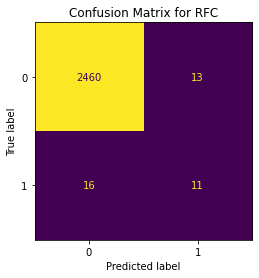

In [75]:
#RFC Confusion Matrix

disp = metrics.plot_confusion_matrix(RFC, X_test, y_test, colorbar=False)

plt.title("Confusion Matrix for RFC")

print(disp.confusion_matrix)

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = -cross_val_score(RFC, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# fit the model on the whole dataset
RFC.fit(X, y)

# make a single prediction
row = [[-8.52381793,5.24451077]]
yhat = RFC.predict(row)
print('Predicted Class: %d' % yhat[0])

Accuracy: -0.988 (0.003)
Predicted Class: 0


You are using pip version 19.0, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


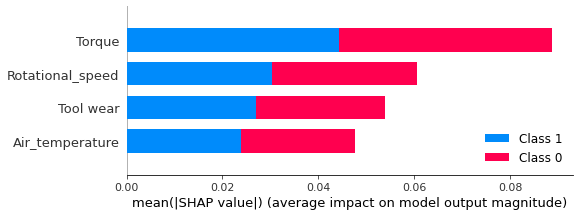

In [87]:
#SHAP Analysis

!pip install shap
import shap

y = df['Machine failure']

X = df[['Air_temperature', 'Rotational_speed', 'Torque', "Tool wear"]]

clf = RandomForestClassifier(n_estimators=500, random_state=23)
clf.fit(X, y)

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])

True Class (if 1, Machine Failure, othewise No Machine Failure): 0
Probability that this data point belong to class 0 = 1.00
Base Probability for class 0 = 0.97


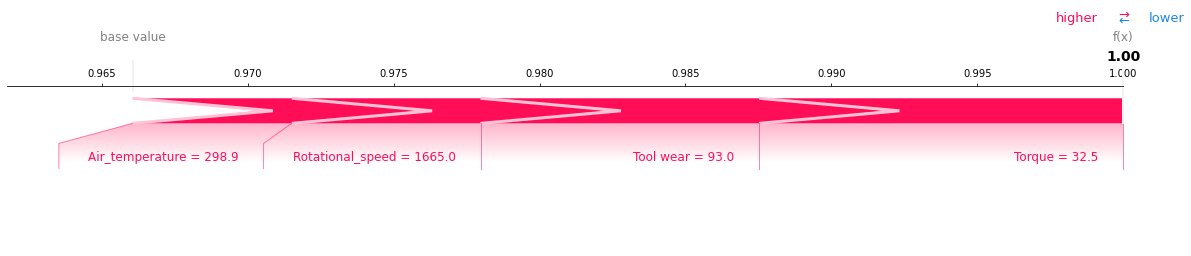

In [84]:
object_i = 33
class_object_i = int(y[::200].iloc[object_i])
print('True Class (if 1, Machine Failure, othewise No Machine Failure):', class_object_i)
print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

shap.force_plot(explainer.expected_value[0], 
                shap_values[0][object_i,:], 
                X.iloc[object_i,:], 
                matplotlib=True)

In [88]:
git init
git add README.md
git add RandomForestClassificatoin.ipynb
git commit -m "notebook first commit" 
5. git remote add origin https://github.com/allysadallmann/Team-5-Group-Project
6. git push -u origin master 

SyntaxError: invalid syntax (<ipython-input-88-7d507f6b9068>, line 1)

In [89]:
!pip install git+git://github.com/Expt-David/NumSchrodingerEq.git

  Cloning git://github.com/Expt-David/NumSchrodingerEq.git to /tmp/pip-req-build-78en2b38
fatal: unable to connect to github.com:
github.com[0: 140.82.114.3]: errno=Connection timed out

Command "git clone -q git://github.com/Expt-David/NumSchrodingerEq.git /tmp/pip-req-build-78en2b38" failed with error code 128 in None
You are using pip version 19.0, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
